In [1]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [2]:
# inputs parameters
cgpa = ctrl.Antecedent(np.arange(0, 101, 1), 'cgpa') #scaled to hundred
gre = ctrl.Antecedent(np.arange(0, 341, 1), 'gre')
papers = ctrl.Antecedent(np.arange(0, 11, 1), 'papers')

# output parameter
admission = ctrl.Consequent(np.arange(0, 11, 1), 'admission')

In [3]:
#setting different ranges of cgpa
cgpa["low"]=fuzzy.trimf(cgpa.universe,[0 , 30 , 50])
cgpa["medium"]=fuzzy.trimf(cgpa.universe,[40 , 60 , 80])
cgpa["high"]=fuzzy.trimf(cgpa.universe,[70 , 80 , 100])

In [4]:
#setting different ranges of gre 
gre["low"]=fuzzy.trimf(gre.universe,[0 , 75 , 150])
gre["medium"]=fuzzy.trimf(gre.universe,[130 , 185 , 240])
gre["high"]=fuzzy.trimf(gre.universe,[220 , 260 , 300])
gre["very high"]=fuzzy.trimf(gre.universe,[280 , 320 , 340])

In [5]:
#setting different ranges of papers
papers["low"]=fuzzy.trimf(papers.universe,[0 , 2 , 4])
papers["medium"]=fuzzy.trimf(papers.universe,[3  , 6 , 8])
papers["high"]=fuzzy.trimf(papers.universe,[7 , 9 , 10])

/home/aditya/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


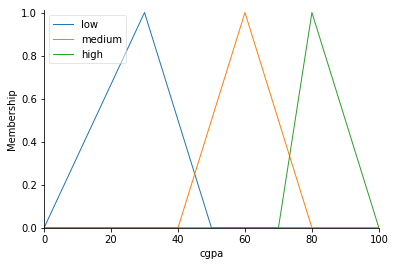

In [6]:
cgpa.view()

/home/aditya/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


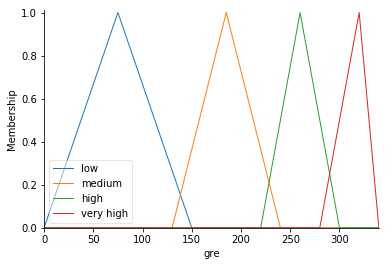

In [8]:
gre.view()

/home/aditya/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


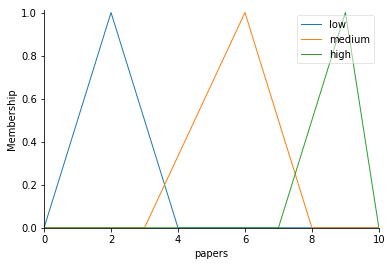

In [10]:
papers.view()

In [27]:
admission["low"]=fuzzy.trimf(admission.universe,[0,3,5])
admission["medium"]=fuzzy.trimf(admission.universe,[4,6,8])
admission["high"]=fuzzy.trimf(admission.universe,[7,10,10])

/home/aditya/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


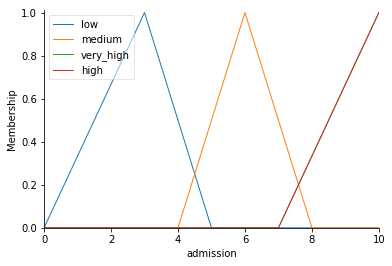

In [28]:
admission.view()

In [48]:
#setting rules
rule1 = ctrl.Rule( cgpa['low'] | gre['low'] | papers['low'] ,  admission['low'])
rule2 = ctrl.Rule( cgpa['low'] | gre['low'] | papers['medium'] , admission['low'])
rule3 = ctrl.Rule( cgpa['low'] | gre['medium'] | papers['medium']  , admission['low'])
rule4 = ctrl.Rule( cgpa['medium'] | gre['medium'] | papers['medium'] , admission['medium'])
rule5 = ctrl.Rule( cgpa['medium'] | gre['high'] | papers['low'] , admission['medium'])
rule6 = ctrl.Rule( cgpa['high'] | gre['high'] | papers['medium']  , admission['medium'])
rule7 = ctrl.Rule( cgpa['high'] | gre['very high'] | papers['medium'] , admission['high'])
rule8 = ctrl.Rule( cgpa['high'] | gre['high'] | papers['high'] , admission['high'])
rule9 = ctrl.Rule( cgpa['high'] | gre['very high'] | papers['high'] , admission['high'])

In [49]:
admission_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [50]:
calculate = ctrl.ControlSystemSimulation(admission_ctrl)

In [51]:
calculate.input["cgpa"]=float(input("enter cgpa"))
calculate.input["gre"]=float(input("enter gre score"))
calculate.input["papers"]=float(input("enter no. of papers"))

calculate.compute()

enter cgpa90
enter gre score330
enter no. of papers9


In [52]:
calculate.output["admission"]

7.5

/home/aditya/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


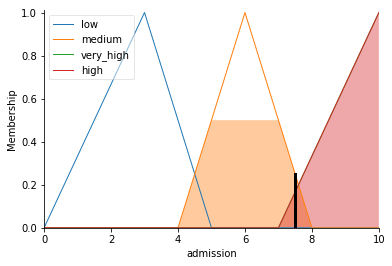

In [53]:
admission.view(sim=calculate)